In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv('/gdrive/MyDrive/Hackathon/HackDearborn_Yazaki_MfgInfo_SECRET.xlsx - HackDearborn_Yazaki_MfgInfo_SEC.csv')

In [ ]:
# Interpolate missing values in the 'Capacity' and 'Usage' columns
data['Capacity'].interpolate(method='linear', inplace=True)
data['Usage'].interpolate(method='linear', inplace=True)


In [ ]:
from pandas.core.api import DataFrame

# Create a dictionary with the mapping of old labels to new labels
state_province_mapping = {
    'CHI': 'Coahuila',
    'DGO': 'Durango',
    'CHS': 'Chiapas',
    'MI': 'Michigan',
    'COL': 'Colima',
    'SON': 'Sonora',
    'GTO': 'Guanajuato',
    'TN': 'Tennessee',
    'MX': 'Mexico City',
    'COA': 'Coahuila'
}

# Use the replace() method to perform the replacements
data['StateProvince'] = data['StateProvince'].str.upper().replace(state_province_mapping)
data['StateProvince'] = data['StateProvince'].str.lower()

In [ ]:
!pip install geopy

In [ ]:
from geopy.geocoders import Nominatim

# Create a geolocator object
geolocator = Nominatim(user_agent="state_coordinates")

# Define a function to get coordinates for a state
def get_coordinates(state):
    try:
        location = geolocator.geocode(state)
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except:
        return None, None

# Apply the function to create 'Latitude' and 'Longitude' columns
data['Latitude'], data['Longitude'] = zip(*data['StateProvince'].apply(get_coordinates))


In [ ]:
data

,PlantName,StateProvince,ManufacturingRegion,CountryName,Capacity,Usage,PreferredLogistics,Latitude,Longitude
0,Plant 1,durango,Central,Mexico,88746.00000,101478.271300,road,24.833333,-104.833333
1,Plant 2,coahuila,North 2,Mexico,114163.89210,109356.941933,plane,27.333333,-102.000000
2,Plant 3,nuevo leon,Northeast,Mexico,139581.78420,117235.612567,road/plane,26.238436,-99.887300
3,Plant 4,durango,Central,Mexico,164999.67630,125114.283200,road/plane,24.833333,-104.833333
4,Plant 5,chiapas,Southeast,Mexico,97315.87725,188926.740700,plane,16.500000,-92.500000
...,...,...,...,...,...,...,...,...,...
64,Plant 65,durango,Northwest,Mexico,240257.23250,366083.494300,road/plane,24.833333,-104.833333
65,Plant 66,tennessee,US,United States,160749.33793,238365.878600,road/plane,35.773008,-86.282008
66,Plant 67,chihuahua,North 2,Mexico,81241.44336,110648.262900,road,28.500000,-106.000000
67,Plant 68,chiapas,Southeast 2,Mexico,120760.42650,178341.989600,road/plane,16.500000,-92.500000


In [ ]:
# Assuming you have your DataFrame ready, which includes the added 'Latitude' and 'Longitude' columns
data.to_csv('/gdrive/MyDrive/Hackathon/yakazaki.csv', index=False)


---------------------------------------------------

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv('/gdrive/MyDrive/Hackathon/yakazaki.csv')

In [ ]:
#visual display of the locations of plants
import folium
import pandas as pd

m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Iterate through the rows in your dataset and add markers to the map
for index, row in data.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['PlantName']}, {row['StateProvince']}, {row['CountryName']}",
    ).add_to(m)
m


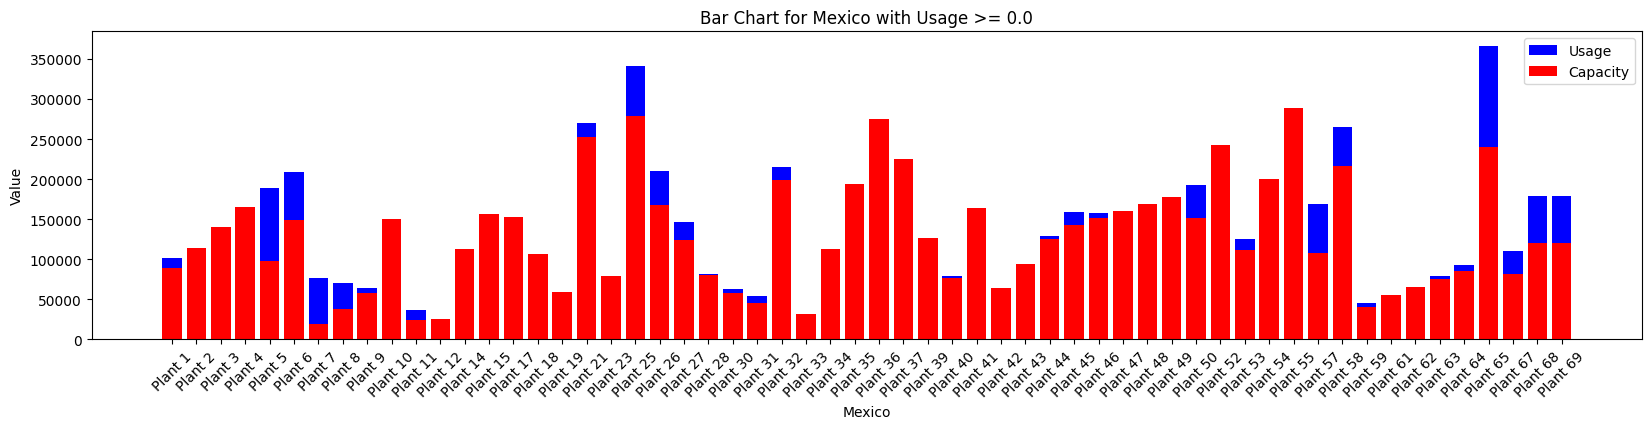

In [ ]:
#interactive bar graph that slices the data according to country, state and region
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

# Create widgets for slicer options and usage
options = ['All'] + data['StateProvince'].unique().tolist() + data['ManufacturingRegion'].unique().tolist() + data['CountryName'].unique().tolist()
slicer_widget = widgets.Dropdown(
    options=options,
    description='Slicer:',
    disabled=False
)

usage_widget = widgets.FloatSlider(
    value=0,
    min=0,
    max=data['Usage'].max(),
    step=1,
    description='Usage:',
    disabled=False,
    continuous_update=False
)
def update_plot(slicer, usage):
    if slicer == 'All':
        filtered_data = data[data['Usage'] >= usage]
    elif slicer in data['StateProvince'].unique():
        filtered_data = data[(data['StateProvince'] == slicer) & (data['Usage'] >= usage)]
    elif slicer in data['ManufacturingRegion'].unique():
        filtered_data = data[(data['ManufacturingRegion'] == slicer) & (data['Usage'] >= usage)]
    elif slicer in data['CountryName'].unique():
        filtered_data = data[(data['CountryName'] == slicer) & (data['Usage'] >= usage)]

    # Create a bar chart for 'Usage' in blue and 'Capacity' in red
    plt.figure(figsize=(20, 4))
    plt.bar(filtered_data['PlantName'], filtered_data['Usage'], color='blue', label='Usage')
    plt.bar(filtered_data['PlantName'], filtered_data['Capacity'], color='red', label='Capacity')
    plt.xlabel(slicer)
    plt.ylabel('Value')
    plt.title(f'Bar Chart for {slicer} with Usage >= {usage}')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()


# Connect the widgets to the function
interactive_plot = widgets.interactive(update_plot, slicer=slicer_widget, usage=usage_widget)

# Display the interactive slicer and visualization
display(slicer_widget)
display(usage_widget)
display(interactive_plot)

In [ ]:
#Visual map for showcasing plants that have different type sof logistics
import pandas as pd
import ipywidgets as widgets
import folium
from IPython.display import display

logistics_widget = widgets.Dropdown(
    options=['All'] + data['PreferredLogistics'].unique().tolist(),
    description='Preferred Logistics:',
    disabled=False
)

def display_plant_map(preferred_logistics):
    if preferred_logistics == 'All':
        filtered_data = data
    else:
        filtered_data = data[data['PreferredLogistics'] == preferred_logistics]

    m = folium.Map(location=[filtered_data['Latitude'].mean(), filtered_data['Longitude'].mean()], zoom_start=6)

    for index, row in filtered_data.iterrows():
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=row['PlantName']
        ).add_to(m)

    display(m)

interactive_map = widgets.interactive(display_plant_map, preferred_logistics=logistics_widget)
display(logistics_widget)
display(interactive_map)





In [ ]:
import pandas as pd
import ipywidgets as widgets
import folium
from IPython.display import display

plant_selector = widgets.Dropdown(
    options=['Select a Plant'] + data['PlantName'].unique().tolist(),
    description='Plant:',
    disabled=False
)
usage_input = widgets.IntText(
    value=0,
    description='Usage:',
    disabled=False
)
update_button = widgets.Button(
    description='Update Usage',
    disabled=False
)

def display_plant_map(plant, usage):
    if plant == 'Select a Plant':
        filtered_data = data
    else:
        filtered_data = data[data['PlantName'] == plant]

    m = folium.Map(location=[filtered_data['Latitude'].mean(), filtered_data['Longitude'].mean()], zoom_start=6)

    for index, row in filtered_data.iterrows():
        if row['Usage'] > row['Capacity']:
            color = 'red'
        else:
            color = 'blue'

        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=f"{row['PlantName']}<br>Usage: {row['Usage']}<br>Capacity: {row['Capacity']}",
            icon=folium.Icon(color=color)
        ).add_to(m)

    display(m)

def update_usage(button):
    new_usage = usage_input.value
    selected_plant = plant_selector.value
    if selected_plant != 'Select a Plant':
        data.loc[data['PlantName'] == selected_plant, 'Usage'] = new_usage
        display_plant_map(selected_plant, new_usage)

interactive_map = widgets.interactive(display_plant_map, plant=plant_selector, usage=usage_input)
update_button.on_click(update_usage)

display(plant_selector)
display(usage_input)
display(update_button)
display(interactive_map)


Dropdown(description='Plant:', options=('Select a Plant', 'Plant 1', 'Plant 2', 'Plant 3', 'Plant 4', 'Plant 5…

IntText(value=0, description='Usage:')

Button(description='Update Usage', style=ButtonStyle())

interactive(children=(Dropdown(description='Plant:', options=('Select a Plant', 'Plant 1', 'Plant 2', 'Plant 3…

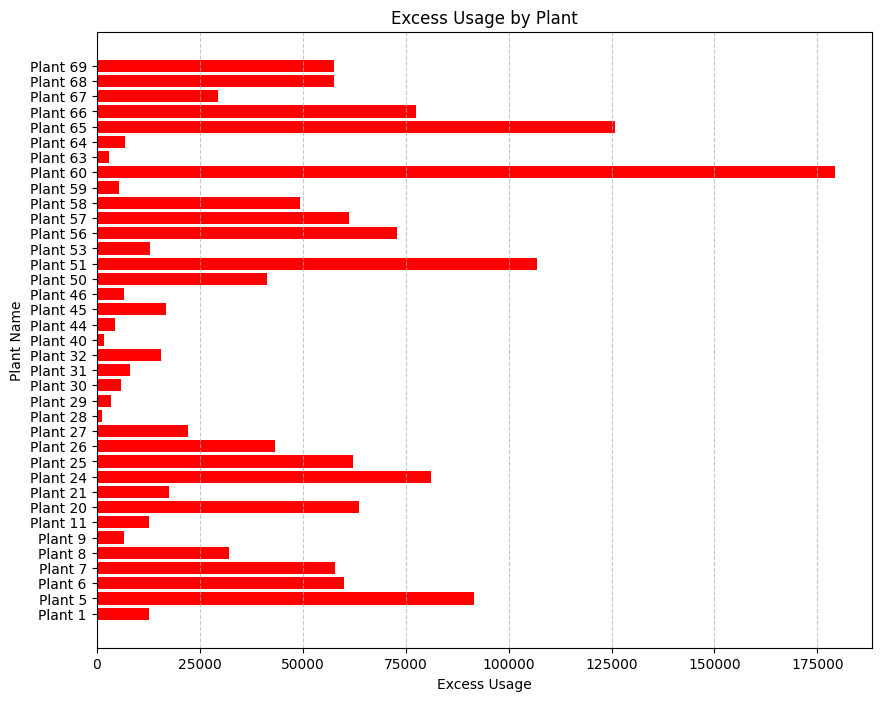

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


data['Excess'] = data['Usage'] - data['Capacity']

excess_data = data[data['Excess'] > 0]

plt.figure(figsize=(10, 8))
plt.barh(excess_data['PlantName'], excess_data['Excess'], color='red')
plt.xlabel('Excess Usage')
plt.ylabel('Plant Name')
plt.title('Excess Usage by Plant')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()
